In [5]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

# Demonstrate Artist vs Scripting Layers of MatPlotLib

In [6]:
# ARTIST LAYER demonstration
from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas #import FigureCanvas
from matplotlib.figure import Figure #import Figure artist
fig = Figure()
canvas = FigureCanvas(fig)

#create 10000 random numbers using numpy
import numpy as np
x = np.random.randn(10000)

ax = fig.add_subplot(111) #create an axes artist 1 row 1 column and first cell

ax.hist(x, 100) #generate a histogram of the 10000 numbers

#add a title to the figure and save
ax.set_title('Normal distribution with #\mu=0, \signma=1$')
fig.savefig('matplotlib_histogram.png')

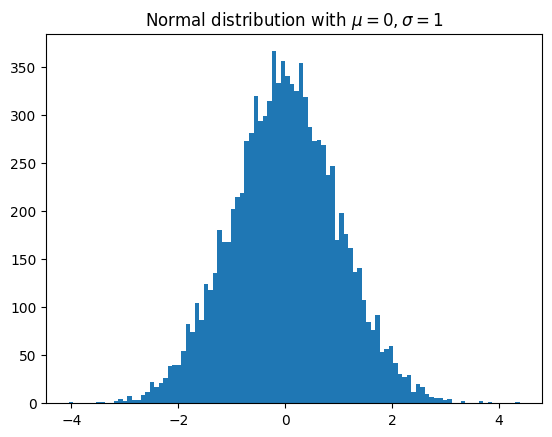

In [7]:
# SCRIPTING LAYER demonstration
# developed for scientists

x = np.random.randn(10000)
plt.hist(x, 100)
plt.title(r'Normal distribution with $\mu=0, \sigma=1$')
#plt.savefig('matplotlib_historgram_scptlayer.png')
plt.show()

In [8]:
# %matplotlib notebook
#only works in Jupyter see https://stackoverflow.com/questions/52859983/interactive-matplotlib-figures-in-google-colab

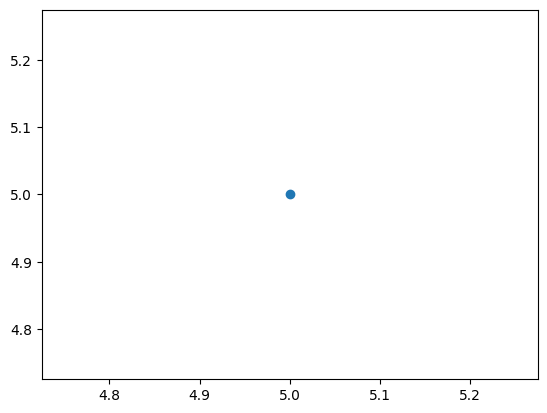

In [9]:
plt.plot(5,5,'o')

# Import Data from Excel

In [10]:
import pandas as pd
from __future__ import print_function #adds compatibility to python2

In [11]:
!pip install xlrd

In [12]:
print('xlrd installed!')

xlrd installed!


In [13]:
df_can = pd.read_excel('https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DV0101EN/labs/Data_Files/Canada.xlsx',
                       sheet_name="Canada by Citizenship",
                       skiprows=range(20),
                       skipfooter=2)

In [14]:
df_can.head()

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,...,0,0,1,1,0,0,0,0,1,1


In [15]:
df_can.columns

Index([    'Type', 'Coverage',   'OdName',     'AREA', 'AreaName',      'REG',
        'RegName',      'DEV',  'DevName',       1980,       1981,       1982,
             1983,       1984,       1985,       1986,       1987,       1988,
             1989,       1990,       1991,       1992,       1993,       1994,
             1995,       1996,       1997,       1998,       1999,       2000,
             2001,       2002,       2003,       2004,       2005,       2006,
             2007,       2008,       2009,       2010,       2011,       2012,
             2013],
      dtype='object')

In [16]:
#clean columns
df_can.drop(['AREA','REG','DEV','Type','Coverage'], axis=1, inplace=True)
df_can.rename(columns={'OdName':'Country', 'AreaName':'Continent', 'RegName':'Region'}, inplace=True)
#add TOTAL column
df_can['Total'] = df_can.sum(axis=1)

<ipython-input-16-6a640dbd4334>:5: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_can['Total'] = df_can.sum(axis=1)


In [17]:
df_can.describe()

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,508.394872,566.989744,534.723077,387.435897,376.497436,358.861538,441.271795,691.133333,714.389744,843.241026,...,1320.292308,1266.958974,1191.820513,1246.394872,1275.733333,1420.287179,1262.533333,1313.958974,1320.702564,32867.451282
std,1949.588546,2152.643752,1866.997511,1204.333597,1198.246371,1079.309600,1225.576630,2109.205607,2443.606788,2555.048874,...,4425.957828,3926.717747,3443.542409,3694.573544,3829.630424,4462.946328,4030.084313,4247.555161,4237.951988,91785.498686
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.500000,1.000000,1.000000,...,28.500000,25.000000,31.000000,31.000000,36.000000,40.500000,37.500000,42.500000,45.000000,952.000000
50%,13.000000,10.000000,11.000000,12.000000,13.000000,17.000000,18.000000,26.000000,34.000000,44.000000,...,210.000000,218.000000,198.000000,205.000000,214.000000,211.000000,179.000000,233.000000,213.000000,5018.000000
75%,251.500000,295.500000,275.000000,173.000000,181.000000,197.000000,254.000000,434.000000,409.000000,508.500000,...,832.000000,842.000000,899.000000,934.500000,888.000000,932.000000,772.000000,783.000000,796.000000,22239.500000
max,22045.000000,24796.000000,20620.000000,10015.000000,10170.000000,9564.000000,9470.000000,21337.000000,27359.000000,23795.000000,...,42584.000000,33848.000000,28742.000000,30037.000000,29622.000000,38617.000000,36765.000000,34315.000000,34129.000000,691904.000000


In [18]:
df_can.set_index('Country', inplace=True)

In [19]:
df_can.head()

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15699
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,...,0,1,1,0,0,0,0,1,1,15


In [20]:
# optional: to remove the name of the index
# df_can.index.name = None

In [21]:
# for consitency, ensure all column labels of type string
# let's examine thetypes of the column labels
all(isinstance(column, str) for column in df_can.columns)

False

In [22]:
df_can.columns = list(map(str, df_can.columns))

# let's check the column labels types now
all(isinstance(column, str) for column in df_can.columns)

True

In [23]:
# finally, let's create a list of years from 1980 - 2013
# this will come in handy when we start plotting the data
years = list(map(str, range(1980, 2014)))

# Test Lookups By Country Name

In [24]:
df_can.loc['Japan']

Continent                 Asia
Region            Eastern Asia
DevName      Developed regions
1980                       701
1981                       756
1982                       598
1983                       309
1984                       246
1985                       198
1986                       248
1987                       422
1988                       324
1989                       494
1990                       379
1991                       506
1992                       605
1993                       907
1994                       956
1995                       826
1996                       994
1997                       924
1998                       897
1999                      1083
2000                      1010
2001                      1092
2002                       806
2003                       817
2004                       973
2005                      1067
2006                      1212
2007                      1250
2008                      1284
2009    

In [25]:
df_can.loc['Japan'].T

Continent                 Asia
Region            Eastern Asia
DevName      Developed regions
1980                       701
1981                       756
1982                       598
1983                       309
1984                       246
1985                       198
1986                       248
1987                       422
1988                       324
1989                       494
1990                       379
1991                       506
1992                       605
1993                       907
1994                       956
1995                       826
1996                       994
1997                       924
1998                       897
1999                      1083
2000                      1010
2001                      1092
2002                       806
2003                       817
2004                       973
2005                      1067
2006                      1212
2007                      1250
2008                      1284
2009    

In [26]:
pd.DataFrame(df_can.loc['Japan']).T

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Japan,Asia,Eastern Asia,Developed regions,701,756,598,309,246,198,248,...,1067,1212,1250,1284,1194,1168,1265,1214,982,27707


In [27]:
# check for datatype of each column
for x in df_can.columns.values:
    print(x, type(x))

Continent <class 'str'>
Region <class 'str'>
DevName <class 'str'>
1980 <class 'str'>
1981 <class 'str'>
1982 <class 'str'>
1983 <class 'str'>
1984 <class 'str'>
1985 <class 'str'>
1986 <class 'str'>
1987 <class 'str'>
1988 <class 'str'>
1989 <class 'str'>
1990 <class 'str'>
1991 <class 'str'>
1992 <class 'str'>
1993 <class 'str'>
1994 <class 'str'>
1995 <class 'str'>
1996 <class 'str'>
1997 <class 'str'>
1998 <class 'str'>
1999 <class 'str'>
2000 <class 'str'>
2001 <class 'str'>
2002 <class 'str'>
2003 <class 'str'>
2004 <class 'str'>
2005 <class 'str'>
2006 <class 'str'>
2007 <class 'str'>
2008 <class 'str'>
2009 <class 'str'>
2010 <class 'str'>
2011 <class 'str'>
2012 <class 'str'>
2013 <class 'str'>
Total <class 'str'>


# Demonstrate Graphs

## Demonstrate Line Plots

In [28]:
haiti = df_can.loc['Haiti'][3:-1]
haiti = haiti.astype(int)


<Axes: >

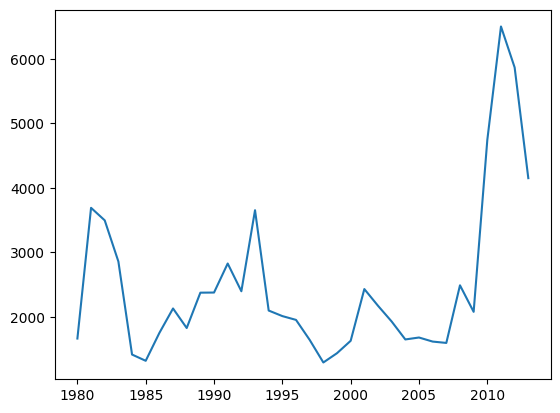

In [29]:
haiti.plot()
#pandas auto populates x-axis with index values (years)

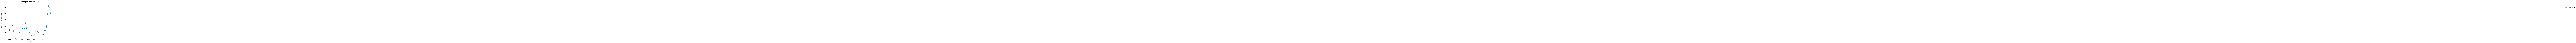

In [30]:
# Add label to line graph
haiti.plot(kind='line')
plt.title('Immigration from Haiti')
plt.ylabel('Number of immigrants')
plt.xlabel('Years')
plt.text(2000, 6000, '2010 Earthquake') # using `plt.text(x, y, label)`
plt.show()

In [31]:
df_can.loc[['China','India']]

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
China,Asia,Eastern Asia,Developing regions,5123,6682,3308,1863,1527,1816,1960,...,42584,33518,27642,30037,29622,30391,28502,33024,34129,659962
India,Asia,Southern Asia,Developing regions,8880,8670,8147,7338,5704,4211,7150,...,36210,33848,28742,28261,29456,34235,27509,30933,33087,691904


In [32]:
df_canCI = df_can.loc[['China', 'India']].iloc[:, 3:-1] #all rows and partial columns
df_canCI

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Country,,,,,,,,,,,,,,,,,,,,,
China,5123,6682,3308,1863,1527,1816,1960,2643,2758,4323,...,36619,42584,33518,27642,30037,29622,30391,28502,33024,34129
India,8880,8670,8147,7338,5704,4211,7150,10189,11522,10343,...,28235,36210,33848,28742,28261,29456,34235,27509,30933,33087


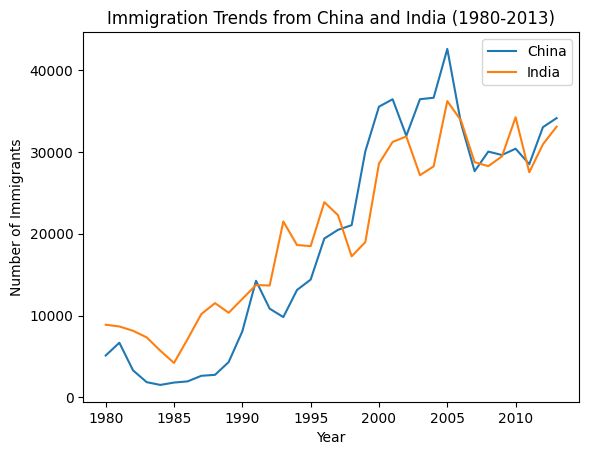

In [33]:
# Include this magic command to display plots inline
#%matplotlib inline
# Plotting China and India's immigration data
df_canCI.loc['China'].plot(kind='line', label='China')
df_canCI.loc['India'].plot(kind='line', label='India')

# Adding labels and title
plt.xlabel('Year')
plt.ylabel('Number of Immigrants')
plt.title('Immigration Trends from China and India (1980-2013)')

# Adding legend
plt.legend()

# Display the plot
plt.show()

## Demonstrate Box Plots

In [34]:
df_can

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15699
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,...,0,1,1,0,0,0,0,1,1,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Viet Nam,Asia,South-Eastern Asia,Developing regions,1191,1829,2162,3404,7583,5907,2741,...,1852,3153,2574,1784,2171,1942,1723,1731,2112,97146
Western Sahara,Africa,Northern Africa,Developing regions,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,2
Yemen,Asia,Western Asia,Developing regions,1,2,1,6,0,18,7,...,161,140,122,133,128,211,160,174,217,2985


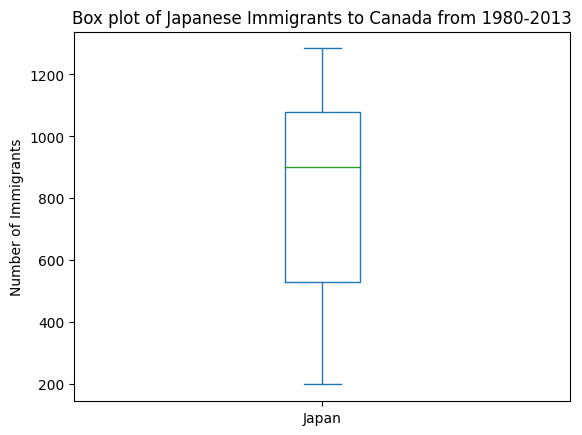

In [35]:
df_japan = df_can.loc[['Japan'], years].transpose()
df_japan.plot(kind='box')
plt.title('Box plot of Japanese Immigrants to Canada from 1980-2013')
plt.ylabel("Number of Immigrants")
plt.show()

## Demonstrate Pie Chart

In [36]:
#create continents dataframe
# group countries by continents and apply sum() function
df_continents = df_can.groupby('Continent', axis=0).sum()

# note: the output of the groupby method is a `groupby' object.
# we can not use it further until we apply a function (eg .sum())
print(type(df_can.groupby('Continent', axis=0)))

df_continents.head()

<class 'pandas.core.groupby.generic.DataFrameGroupBy'>


<ipython-input-36-1a8146e628b2>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_continents = df_can.groupby('Continent', axis=0).sum()


,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Continent,,,,,,,,,,,,,,,,,,,,,
Africa,3951,4363,3819,2671,2639,2650,3782,7494,7552,9894,...,27523,29188,28284,29890,34534,40892,35441,38083,38543,618948
Asia,31025,34314,30214,24696,27274,23850,28739,43203,47454,60256,...,159253,149054,133459,139894,141434,163845,146894,152218,155075,3317794
Europe,39760,44802,42720,24638,22287,20844,24370,46698,54726,60893,...,35955,33053,33495,34692,35078,33425,26778,29177,28691,1410947
Latin America and the Caribbean,13081,15215,16769,15427,13678,15171,21179,28471,21924,25060,...,24747,24676,26011,26547,26867,28818,27856,27173,24950,765148
Northern America,9378,10030,9074,7100,6661,6543,7074,7705,6469,6790,...,8394,9613,9463,10190,8995,8142,7677,7892,8503,241142


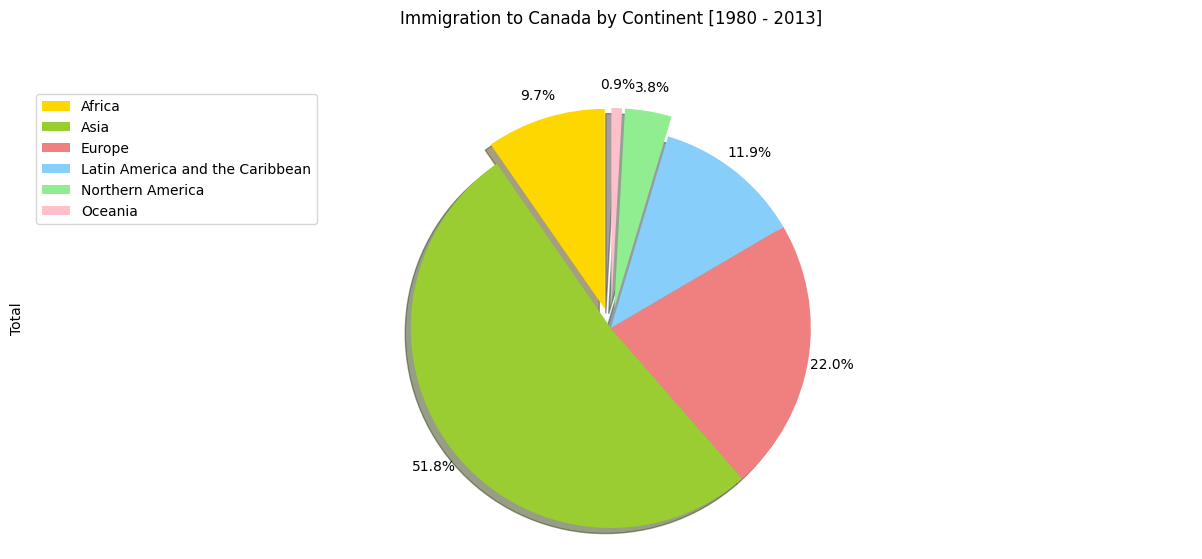

In [37]:
# draw continents as pie chart
colors_list = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'lightgreen', 'pink']
explode_list = [0.1, 0, 0, 0, 0.1, 0.1] # ratio for each continent with which to offset each wedge.

df_continents['Total'].plot(kind='pie',
                            figsize=(15, 6),
                            autopct='%1.1f%%',
                            startangle=90,
                            shadow=True,
                            labels=None,         # turn off labels on pie chart
                            pctdistance=1.12,    # the ratio between the center of each pie slice and the start of the text generated by autopct
                            colors=colors_list,  # add custom colors
                            explode=explode_list # 'explode' lowest 3 continents
                            )

# scale the title up by 12% to match pctdistance
plt.title('Immigration to Canada by Continent [1980 - 2013]', y=1.12)

plt.axis('equal')

# add legend
plt.legend(labels=df_continents.index, loc='upper left')

plt.show()

## Demonstrate Box Plots

In [38]:
# grab the data for the Country 'Japan'
# to get a dataframe, place extra square brackets around 'Japan'.
df_japan = df_can.loc[['Japan'], years].transpose()
df_japan.head()

Country,Japan
1980,701
1981,756
1982,598
1983,309
1984,246


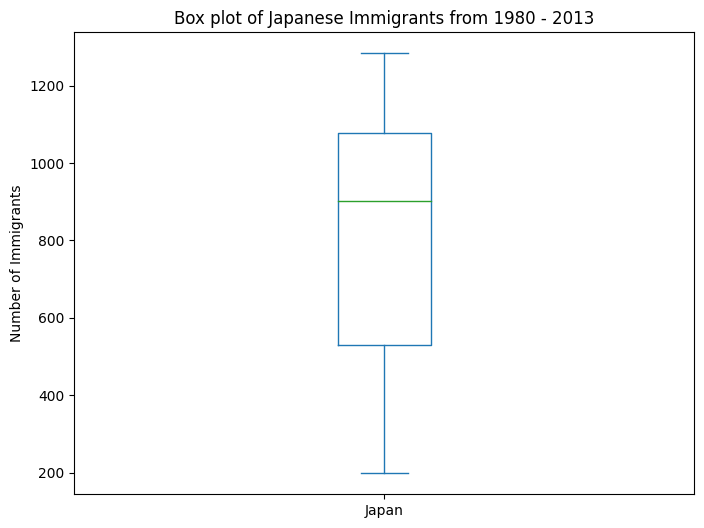

In [39]:
# create box plot
df_japan.plot(kind='box', figsize=(8, 6))

plt.title('Box plot of Japanese Immigrants from 1980 - 2013')
plt.ylabel('Number of Immigrants')

plt.show()

In [40]:
# to see specific amounts use
df_japan.describe()

Country,Japan
count,34.000000
mean,814.911765
std,337.219771
min,198.000000
25%,529.000000
50%,902.000000
75%,1079.000000
max,1284.000000


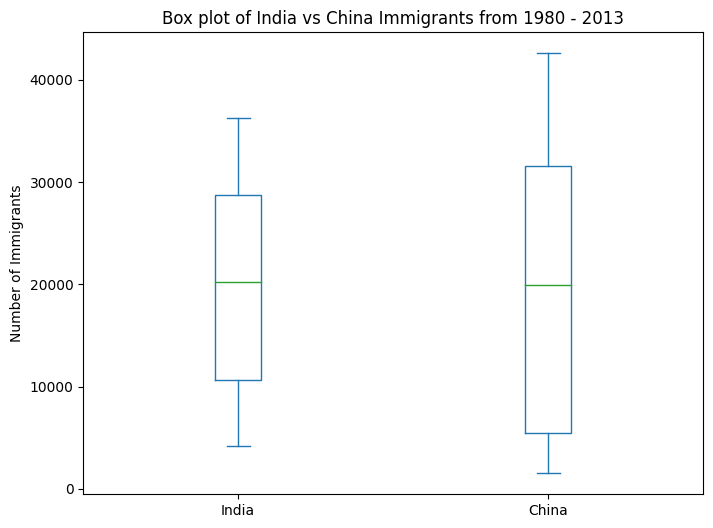

In [41]:
# compare India and China which seem similar
df_CI = df_can.loc[['India','China'], years].transpose()

df_CI.plot(kind='box', figsize=(8, 6))

plt.title('Box plot of India vs China Immigrants from 1980 - 2013')
plt.ylabel('Number of Immigrants')

plt.show()


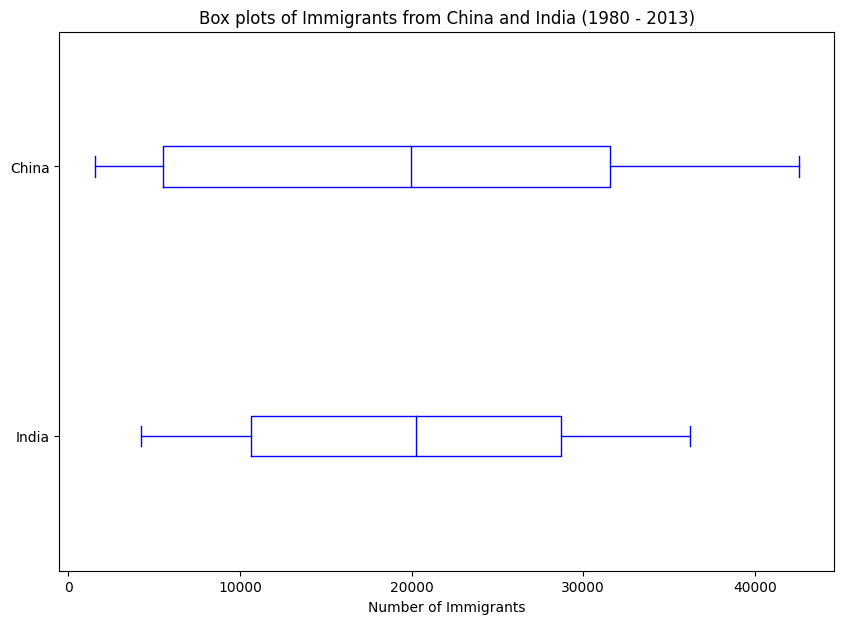

In [42]:
# try horizontally displaying the box plots
df_CI.plot(kind='box', figsize=(10, 7), color='blue', vert=False)

plt.title('Box plots of Immigrants from China and India (1980 - 2013)')
plt.xlabel('Number of Immigrants')

plt.show()

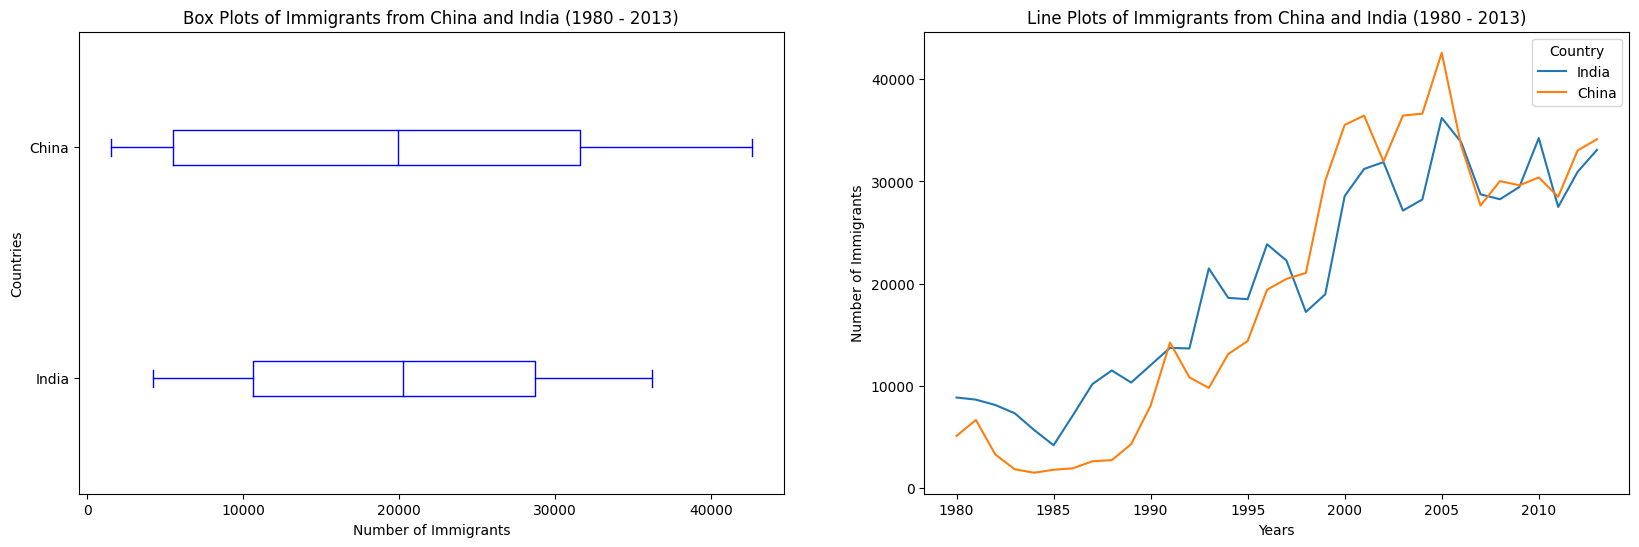

In [43]:
# showcase subplots (module 3)
fig = plt.figure() # create figure

ax0 = fig.add_subplot(1, 2, 1) # add subplot 1 (1 row, 2 columns, first plot)
ax1 = fig.add_subplot(1, 2, 2) # add subplot 2 (1 row, 2 columns, second plot). See tip below**

# Subplot 1: Box plot
df_CI.plot(kind='box', color='blue', vert=False, figsize=(20, 6), ax=ax0) # add to subplot 1
ax0.set_title('Box Plots of Immigrants from China and India (1980 - 2013)')
ax0.set_xlabel('Number of Immigrants')
ax0.set_ylabel('Countries')

# Subplot 2: Line plot
df_CI.plot(kind='line', figsize=(20, 6), ax=ax1) # add to subplot 2
ax1.set_title ('Line Plots of Immigrants from China and India (1980 - 2013)')
ax1.set_ylabel('Number of Immigrants')
ax1.set_xlabel('Years')

plt.show()

Question: Create a box plot to visualize the distribution of the top 15 countries (based on total immigration) grouped by the decades 1980s, 1990s, and 2000s.

In [44]:
# Sort the DataFrame by the 'Total' column in descending order
df_can_sorted = df_can.sort_values(by='Total', ascending=False)

# Get the top 15 countries
df_top15 = df_can_sorted.head(15)

# Display the top 15 countries
df_top15

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
India,Asia,Southern Asia,Developing regions,8880,8670,8147,7338,5704,4211,7150,...,36210,33848,28742,28261,29456,34235,27509,30933,33087,691904
China,Asia,Eastern Asia,Developing regions,5123,6682,3308,1863,1527,1816,1960,...,42584,33518,27642,30037,29622,30391,28502,33024,34129,659962
United Kingdom of Great Britain and Northern Ireland,Europe,Northern Europe,Developed regions,22045,24796,20620,10015,10170,9564,9470,...,7258,7140,8216,8979,8876,8724,6204,6195,5827,551500
Philippines,Asia,South-Eastern Asia,Developing regions,6051,5921,5249,4562,3801,3150,4166,...,18139,18400,19837,24887,28573,38617,36765,34315,29544,511391
Pakistan,Asia,Southern Asia,Developing regions,978,972,1201,900,668,514,691,...,14314,13127,10124,8994,7217,6811,7468,11227,12603,241600
United States of America,Northern America,Northern America,Developed regions,9378,10030,9074,7100,6661,6543,7074,...,8394,9613,9463,10190,8995,8142,7676,7891,8501,241122
Iran (Islamic Republic of),Asia,Southern Asia,Developing regions,1172,1429,1822,1592,1977,1648,1794,...,5837,7480,6974,6475,6580,7477,7479,7534,11291,175923
Sri Lanka,Asia,Southern Asia,Developing regions,185,371,290,197,1086,845,1838,...,4930,4714,4123,4756,4547,4422,3309,3338,2394,148358
Republic of Korea,Asia,Eastern Asia,Developing regions,1011,1456,1572,1081,847,962,1208,...,5832,6215,5920,7294,5874,5537,4588,5316,4509,142581


In [45]:
# Calculate sums for each decade
sums_1980s = df_top15.loc[:, '1980':'1989'].sum(axis=1)
sums_1990s = df_top15.loc[:, '1990':'1999'].sum(axis=1)
sums_2000s = df_top15.loc[:, '2000':'2009'].sum(axis=1)

# Create a new DataFrame with the sums
df_sums = pd.DataFrame({
    "1980s": sums_1980s,
    "1990s": sums_1990s,
    "2000s": sums_2000s
})
new_df = df_sums
new_df

,1980s,1990s,2000s
Country,,,
India,82154,180395,303591
China,32003,161528,340385
United Kingdom of Great Britain and Northern Ireland,179171,261966,83413
Philippines,60764,138482,172904
Pakistan,10591,65302,127598
United States of America,76824,56915,75173
Iran (Islamic Republic of),21477,54871,65794
Sri Lanka,14796,70421,49678
Republic of Korea,16259,38189,68183


In [46]:
new_df.describe()

,1980s,1990s,2000s
count,15.000000,15.000000,15.000000
mean,44418.333333,85594.666667,97471.533333
std,44190.676455,68237.560246,100583.204205
min,7613.000000,30028.000000,13629.000000
25%,16698.000000,39259.000000,36101.500000
50%,30638.000000,56915.000000,65794.000000
75%,59183.000000,104451.500000,105505.500000
max,179171.000000,261966.000000,340385.000000


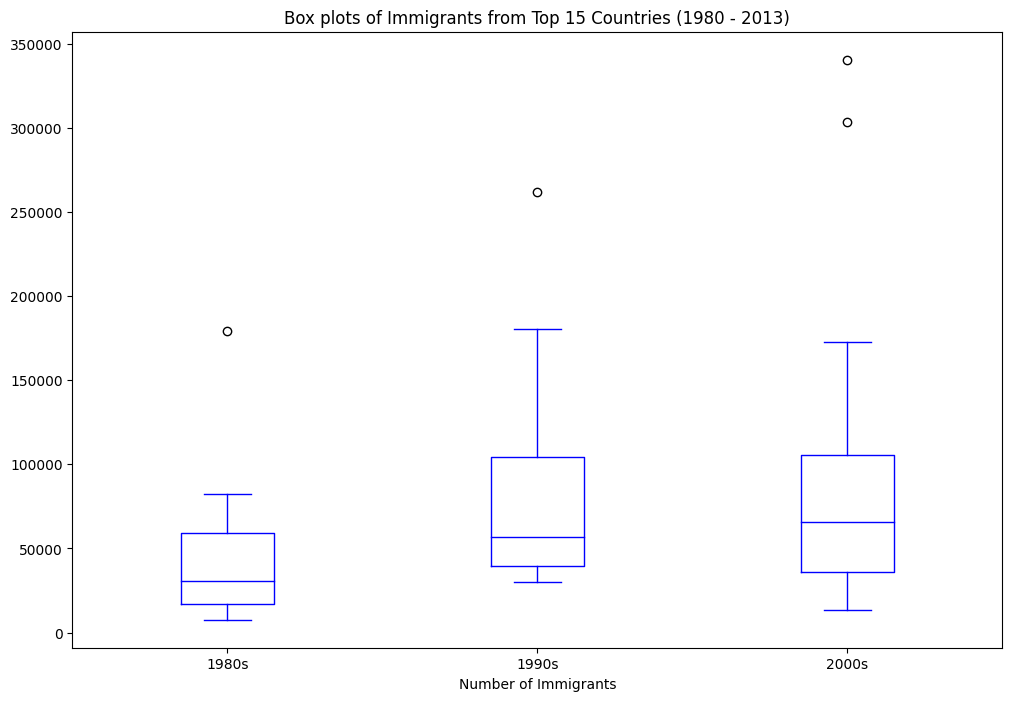

In [47]:
# box plot the top 15 countries
new_df.plot(kind='box',
            figsize=(12,8),
            color='blue',
            vert=True)

plt.title('Box plots of Immigrants from Top 15 Countries (1980 - 2013)')
plt.xlabel('Number of Immigrants')

plt.show()

note: we can see 2 outliers in the 2000s (larger than Q3 by 1.5 times the interquartile range [IQR]).

Q1 (25%) = 35,101.5
Q3 (75%) = 105,505.5
IQR = Q3-Q1 = 69,404
Outliers > 105,505.5 + (1.5 * 69,404) or > 209,611.5

In [48]:
new_df=new_df.reset_index()
new_df[new_df['2000s']> 209611.5]

,Country,1980s,1990s,2000s
0,India,82154,180395,303591
1,China,32003,161528,340385


China and India are both considered as outliers since their population for the decade exceeds 209,611.5.

## Demonstrate Scatter Plots

In [49]:
# **Question**: Create a scatter plot of the total immigration from Denmark, Norway, and Sweden to Canada from 1980 to 2013?

# Select the countries and years of interest
countries = ['Denmark', 'Norway', 'Sweden']
years = list(map(str, range(1980, 2014)))

# Create a DataFrame for the selected countries and years
df_countries = df_can.loc[countries, years]

# Sum across all three countries
df_total = pd.DataFrame(df_countries.sum(axis=0))

# change the years to type int (useful for regression later on)
df_total.index = map(int, df_total.index)

# reset the index to put in back in as a column in the df_tot dataframe
df_total.reset_index(inplace = True)

# rename columns
df_total.columns = ['year', 'total']

df_total

,year,total
0,1980,669
1,1981,678
2,1982,627
3,1983,333
4,1984,252
5,1985,285
6,1986,336
7,1987,387
8,1988,373
9,1989,387


In [50]:
# Check If All Years Are Present: Verify which of the years you're trying to access are missing from df_can
missing_years = set(years) - set(df_can.columns)
print("Missing years:", missing_years)


Missing years: set()


In [51]:
# Check If All Countries Are Present: Verify which countries from your list aren't in df_can:
missing_countries = set(countries) - set(df_can.index)
print("Missing countries:", missing_countries)


Missing countries: set()


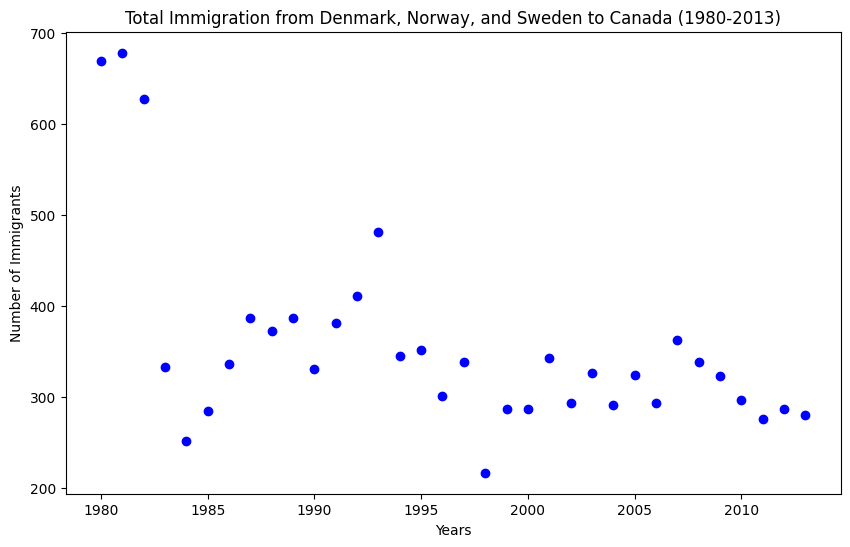

In [52]:
# Plot the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df_total['year'], df_total['total'], color='blue')
# OR as 1-line
# df_total.plot(kind='scatter', x='year', y='total', figsize=(10, 6), color='darkblue')

# Set the title and labels
plt.title('Total Immigration from Denmark, Norway, and Sweden to Canada (1980-2013)')
plt.xlabel('Years')
plt.ylabel('Number of Immigrants')

plt.show()

## Demonstrate Bubble Plots

In [53]:
# **Question**: Previously in this lab, we created box plots to compare immigration from China and India to Canada. Create bubble plots of immigration from China and India to visualize any differences with time from 1980 to 2013. You can use **df_can_t** that we defined and used in the previous example.

In [54]:
# transposed dataframe
df_can_t = df_can[years].transpose()

# cast the Years (the index) to type int
df_can_t.index = map(int, df_can_t.index)

# let's label the index. This will automatically be the column name when we reset the index
df_can_t.index.name = 'Year'

# reset index to bring the Year in as a column
df_can_t.reset_index(inplace=True)

# view the changes
df_can_t.head()

Country,Year,Afghanistan,Albania,Algeria,American Samoa,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,...,United States of America,Uruguay,Uzbekistan,Vanuatu,Venezuela (Bolivarian Republic of),Viet Nam,Western Sahara,Yemen,Zambia,Zimbabwe
0,1980,16,1,80,0,0,1,0,368,0,...,9378,128,0,0,103,1191,0,1,11,72
1,1981,39,0,67,1,0,3,0,426,0,...,10030,132,0,0,117,1829,0,2,17,114
2,1982,39,0,71,0,0,6,0,626,0,...,9074,146,0,0,174,2162,0,1,11,102
3,1983,47,0,69,0,0,6,0,241,0,...,7100,105,0,0,124,3404,0,6,7,44
4,1984,71,0,63,0,0,4,42,237,0,...,6661,90,0,0,142,7583,0,0,16,32


In [55]:
df_can_t = df_CI
# cast the Years (the index) to type int
df_can_t.index = map(int, df_can_t.index)

# let's label the index. This will automatically be the column name when we reset the index
df_can_t.index.name = 'Year'

# reset index to bring the Year in as a column
df_can_t.reset_index(inplace=True)

# view the changes
df_can_t.head()

Country,Year,India,China
0,1980,8880,5123
1,1981,8670,6682
2,1982,8147,3308
3,1983,7338,1863
4,1984,5704,1527


In [56]:
print(df_can_t.dtypes)

Country
Year     int64
India    int64
China    int64
dtype: object


In [57]:
# Convert columns to integer data type
# df_can_t['China'] = df_can_t['China'].astype(int)
# df_can_t['India'] = df_can_t['India'].astype(int)

In [58]:
# normalize China data
norm_china = (df_can_t['China'] - df_can_t['China'].min()) / (df_can_t['China'].max() - df_can_t['China'].min())
display(norm_china)

# normalize India data
norm_india = (df_can_t['India'] - df_can_t['India'].min()) / (df_can_t['India'].max() - df_can_t['India'].min())
display(norm_india)

0     0.087586
1     0.125557
2     0.043379
3     0.008184
4     0.000000
5     0.007039
6     0.010546
7     0.027182
8     0.029983
9     0.068100
10    0.159510
11    0.310008
12    0.226977
13    0.201914
14    0.282558
15    0.313491
16    0.435687
17    0.461505
18    0.475485
19    0.695180
20    0.828166
21    0.850208
22    0.741262
23    0.850330
24    0.854714
25    1.000000
26    0.779185
27    0.636067
28    0.694400
29    0.684293
30    0.703023
31    0.657013
32    0.767153
33    0.794067
Name: China, dtype: float64

0     0.145911
1     0.139348
2     0.123004
3     0.097722
4     0.046658
5     0.000000
6     0.091847
7     0.186818
8     0.228476
9     0.191631
10    0.244695
11    0.297603
12    0.295697
13    0.540173
14    0.450295
15    0.446201
16    0.614019
17    0.564299
18    0.407200
19    0.461358
20    0.761305
21    0.844151
22    0.864965
23    0.717022
24    0.750773
25    1.000000
26    0.926185
27    0.766618
28    0.751586
29    0.788931
30    0.938279
31    0.728085
32    0.835089
33    0.902403
Name: India, dtype: float64

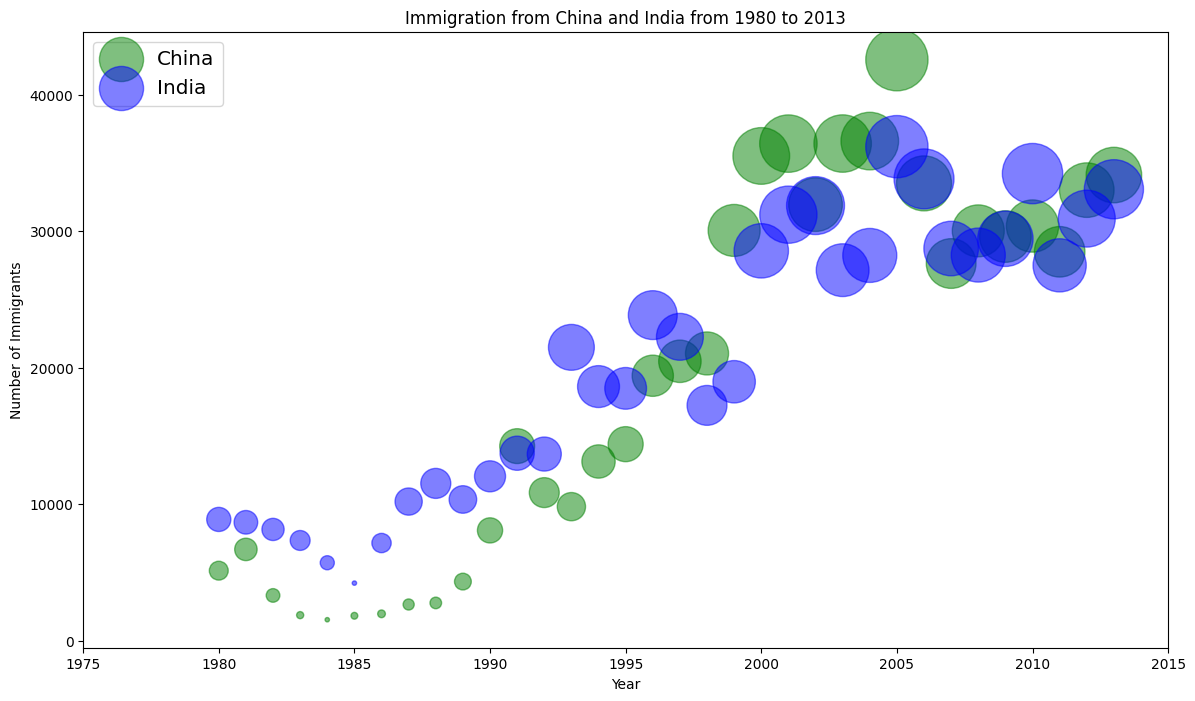

In [59]:
# plot bubbles
# China
ax0 = df_can_t.plot(kind='scatter',
                    x='Year',
                    y='China',
                    figsize=(14, 8),
                    alpha=0.5,  # transparency
                    color='green',
                    s=norm_china * 2000 + 10,  # pass in weights
                    xlim=(1975, 2015)
                    )

# India
ax1 = df_can_t.plot(kind='scatter',
                    x='Year',
                    y='India',
                    alpha=0.5,
                    color="blue",
                    s=norm_india * 2000 + 10,
                    ax=ax0
                    )

ax0.set_ylabel('Number of Immigrants')
ax0.set_title('Immigration from China and India from 1980 to 2013')
ax0.legend(['China', 'India'], loc='upper left', fontsize='x-large')


## Demonstrate Waffle Charts

A waffle chart is an interesting visualization that is normally created to display progress toward goals. It is commonly an effective option when you are trying to add interesting visualization features to a visual that consists mainly of cells, such as an Excel dashboard.  Potential alternative to pie chart!

In [60]:
import matplotlib.patches as mpatches

In [61]:
def create_waffle_chart(categories, values, height, width, colormap, value_sign=''):

    # compute the proportion of each category with respect to the total
    total_values = sum(values)
    category_proportions = [(float(value) / total_values) for value in values]

    # compute the total number of tiles
    total_num_tiles = width * height # total number of tiles
    print ('Total number of tiles is', total_num_tiles)

    # compute the number of tiles for each catagory
    tiles_per_category = [round(proportion * total_num_tiles) for proportion in category_proportions]

    # print out number of tiles per category
    for i, tiles in enumerate(tiles_per_category):
        print (df_dsn.index.values[i] + ': ' + str(tiles))

    # initialize the waffle chart as an empty matrix
    waffle_chart = np.zeros((height, width))

    # define indices to loop through waffle chart
    category_index = 0
    tile_index = 0

    # populate the waffle chart
    for col in range(width):
        for row in range(height):
            tile_index += 1

            # if the number of tiles populated for the current category
            # is equal to its corresponding allocated tiles...
            if tile_index > sum(tiles_per_category[0:category_index]):
                # ...proceed to the next category
                category_index += 1

            # set the class value to an integer, which increases with class
            waffle_chart[row, col] = category_index

    # instantiate a new figure object
    fig = plt.figure()

    # use matshow to display the waffle chart
    colormap = plt.cm.coolwarm
    plt.matshow(waffle_chart, cmap=colormap)
    # plt.colorbar() # removing since it is a scale that doesn't make sense

    # get the axis
    ax = plt.gca()

    # set minor ticks
    ax.set_xticks(np.arange(-.5, (width), 1), minor=True)
    ax.set_yticks(np.arange(-.5, (height), 1), minor=True)

    # add dridlines based on minor ticks
    ax.grid(which='minor', color='w', linestyle='-', linewidth=2)

    plt.xticks([])
    plt.yticks([])

    # compute cumulative sum of individual categories to match color schemes between chart and legend
    values_cumsum = np.cumsum(values)
    total_values = values_cumsum[len(values_cumsum) - 1]

    # create legend
    legend_handles = []
    for i, category in enumerate(categories):
        if value_sign == '%':
            label_str = category + ' (' + str(values[i]) + value_sign + ')'
        else:
            label_str = category + ' (' + value_sign + str(values[i]) + ')'

        color_val = colormap(float(values_cumsum[i])/total_values)
        legend_handles.append(mpatches.Patch(color=color_val, label=label_str))

    # add legend to chart
    plt.legend(
        handles=legend_handles,
        loc='lower center',
        ncol=len(categories),
        bbox_to_anchor=(0., -0.2, 0.95, .1)
    )
    plt.show()

In [62]:
# define our values
df_dsn = df_can.loc[['Denmark', 'Norway', 'Sweden'], :] # dataframe of just 3 countries
width = 40 # width of chart
height = 10 # height of chart

categories = df_dsn.index.values # categories
values = df_dsn['Total'] # correponding values of categories

colormap = plt.cm.coolwarm # color map class

Total number of tiles is 400
Denmark: 129
Norway: 77
Sweden: 194


<Figure size 640x480 with 0 Axes>

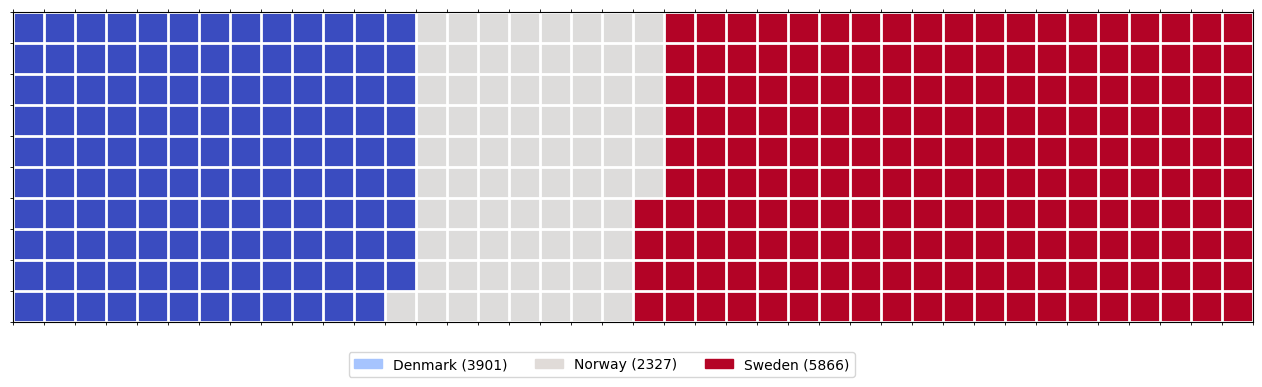

In [63]:
create_waffle_chart(categories, values, height, width, colormap)
# another alternative is to explore PyWaffle https://github.com/gyli/PyWaffle

## Demonstrate Regression Plots (using Seaborn)

In [64]:
import seaborn as sns

In [65]:
# we can use the sum() method to get the total population per year
df_tot = pd.DataFrame(df_can[years].sum(axis=0))

# change the years to type float (useful for regression later on)
df_tot.index = map(float, df_tot.index)

# reset the index to put in back in as a column in the df_tot dataframe
df_tot.reset_index(inplace=True)

# rename columns
df_tot.columns = ['year', 'total']

# view the final dataframe
df_tot.head()

,year,total
0,1980.0,99137
1,1981.0,110563
2,1982.0,104271
3,1983.0,75550
4,1984.0,73417


<Axes: xlabel='year', ylabel='total'>

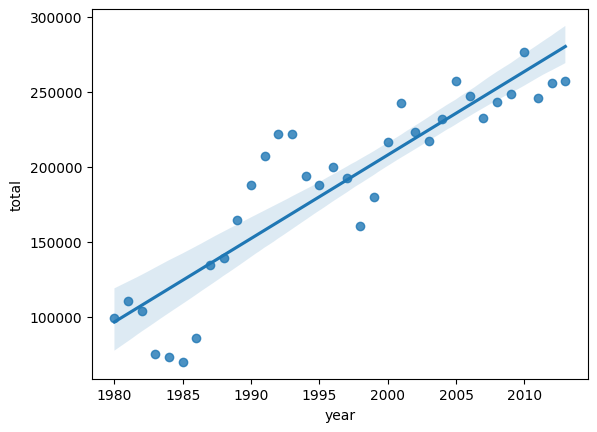

In [66]:
# regplot function call
sns.regplot(x='year', y='total', data=df_tot)

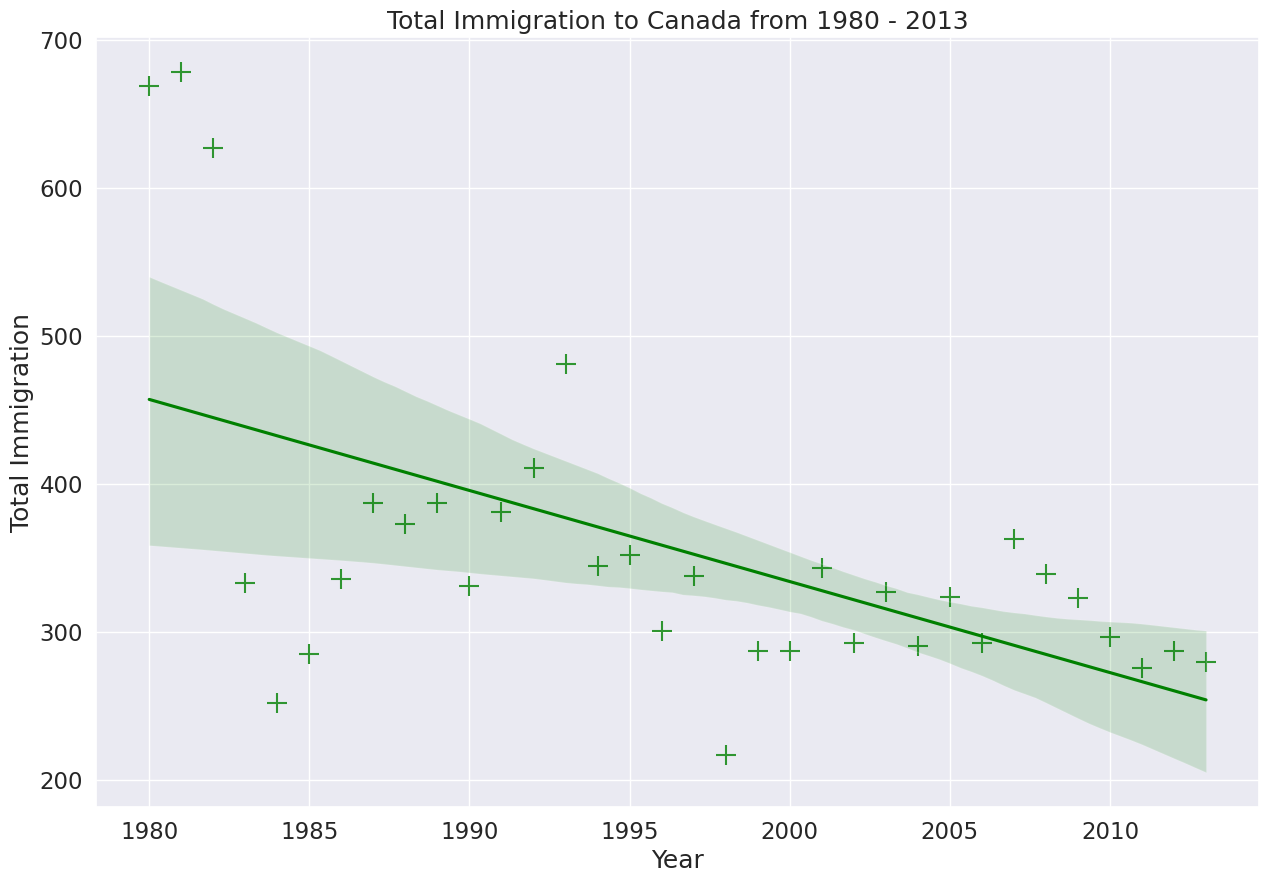

In [67]:
# increase font of labels and marker size zoom in
plt.figure(figsize=(15, 10))

sns.set(font_scale=1.5)  # Corrected keyword argument

ax = sns.regplot(x='year', y='total', data=df_total, color='green', marker='+', scatter_kws={'s': 200}) # Corrected dataframe name from df_tot to df_total
ax.set(xlabel='Year', ylabel='Total Immigration')
ax.set_title('Total Immigration to Canada from 1980 - 2013')
plt.show()


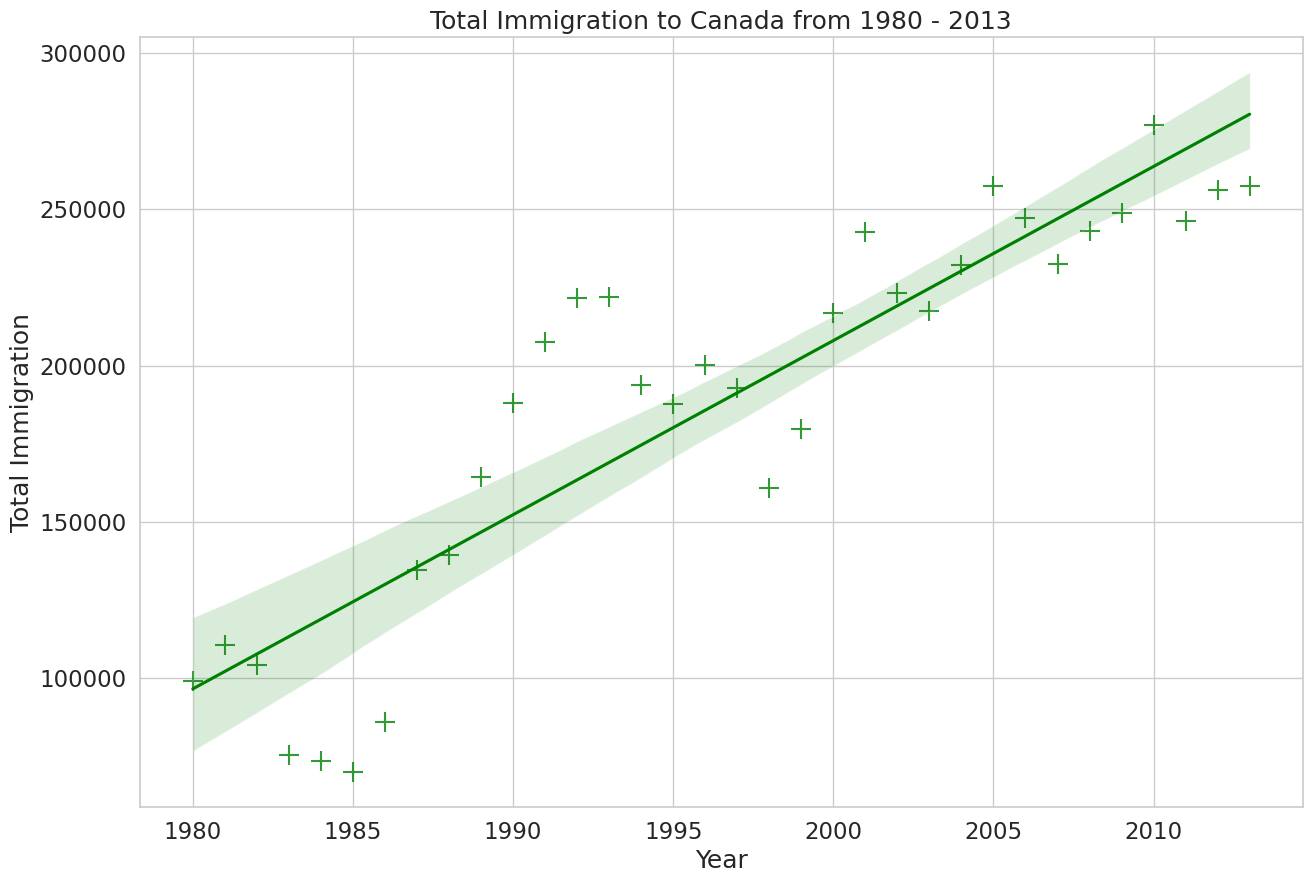

In [68]:
# zoom in with grid lines, green, and + markers
plt.figure(figsize=(15, 10))

sns.set(font_scale=1.5)
sns.set_style('whitegrid')

ax = sns.regplot(x='year', y='total', data=df_tot, color='green', marker='+', scatter_kws={'s': 200})
ax.set(xlabel='Year', ylabel='Total Immigration')
ax.set_title('Total Immigration to Canada from 1980 - 2013')
plt.show()

By default, the sns.regplot function in Seaborn plots a regression line with a shaded area around it, representing the 95% confidence interval for the regression estimate. This means that the shaded area visualizes where we expect the true regression line to be, with 95% confidence.

If you want a different confidence level, you can use the ci parameter. For instance, if you wanted an 80% confidence interval, you'd modify the function call like this:



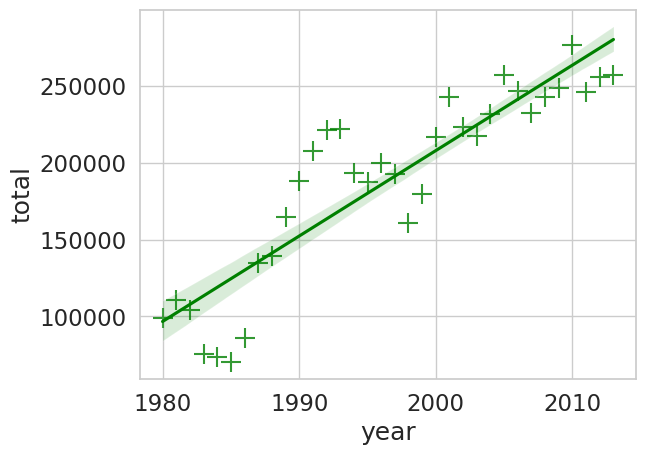

In [69]:
ax = sns.regplot(x='year', y='total', data=df_tot, color='green', marker='+', scatter_kws={'s': 200}, ci=80)


## Demonstrate Mapping using Folium

Whie other libraries exist to visualize geospatial data (plotly), Folium has no API limits and is free.

In [70]:
import folium

In [78]:
# Reset the index of df_can
df_can_reset = df_can.reset_index()

df_can.head()

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15699
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,...,0,1,1,0,0,0,0,1,1,15


In [74]:
!pip install requests

In [75]:
# download countries geojson file
import requests

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/world_countries.json'
response = requests.get(URL)
world_geo = response.json()

print('GeoJSON file loaded!')

GeoJSON file loaded!


In [76]:
# create a plain world map
world_map = folium.Map(location=[0, 0], zoom_start=2)

In [80]:
# generate choropleth map using the total immigration of each country to Canada from 1980 to 2013
folium.Choropleth(
    geo_data=world_geo,
    data=df_can_reset,
    columns=['Country', 'Total'],
    key_on='feature.properties.name',
    fill_color='YlOrRd',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Immigration to Canada'
).add_to(world_map)

# display map
world_map

For reference, if clustering is needed:
```
from folium import plugins

# let's start again with a clean copy of the map of San Francisco
sanfran_map = folium.Map(location = [latitude, longitude], zoom_start = 12)

# instantiate a mark cluster object for the incidents in the dataframe
incidents = plugins.MarkerCluster().add_to(sanfran_map)

# loop through the dataframe and add each data point to the mark cluster
for lat, lng, label, in zip(df_incidents.Y, df_incidents.X, df_incidents.Category):
    folium.Marker(
        location=[lat, lng],
        icon=None,
        popup=label,
    ).add_to(incidents)

# display map
sanfran_map
```